In [93]:
## Hello, I'm Snithin
## Hola!!

# Import Library

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from textblob import Word
from nltk import word_tokenize,sent_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")

# Web Scrapping

In [95]:
import requests
from bs4 import BeautifulSoup
x = 2;
link = "https://www.trustpilot.com/review/www.airasia.com"
page="?page="
req = requests.get(link)
currentPage = req.url
print(currentPage)
url = link 
print(url)

reviewStar = []
reviewContent = []
reviewTitle = []

while (True):
    url = link + page + str(x)
    htmlText = req.text
    splitList = htmlText.split("review-content__title")
    del(splitList[0])

    
    listRange = len(splitList)
    for i in range(listRange):
        afterFirstSplit = splitList[i].split('">')[1]
        afterSecondSplit = afterFirstSplit.split('</a>')[0]
        i += 1
        reviewTitle.append(afterSecondSplit)
    
    splitList = htmlText.split("review-content__text")
    del(splitList[0])
    
    listRange = len(splitList)
    for i in range(listRange):
        afterFirstSplit = splitList[i].split('>\n')[1]
        afterSecondSplit = afterFirstSplit.split('\n</p>')[0]
        i += 1
        reviewContent.append(afterSecondSplit)

    splitList = htmlText.split("star-rating star-rating--medium")
    del(splitList[0])
    
    listRange = len(splitList)
    for i in range(listRange):
        afterFirstSplit = splitList[i].split('stars/stars-')[1]
        afterSecondSplit = afterFirstSplit.split('.svg')[0]
        i += 1
        reviewStar.append(afterSecondSplit)
    
    print(url)
    x+=1
    req = requests.get(url)
    currentPage = req.url
    print(currentPage)
    print(currentPage != link)
    if (currentPage == link):
        break
    
dataset = pd.DataFrame({'Rating': reviewStar, 'Title': reviewTitle, 'Comment': reviewContent})
dataset.to_csv(r'airaia.csv', index = None, header=True)


https://www.trustpilot.com/review/www.airasia.com
https://www.trustpilot.com/review/www.airasia.com
https://www.trustpilot.com/review/www.airasia.com?page=2
https://www.trustpilot.com/review/www.airasia.com?page=2
True
https://www.trustpilot.com/review/www.airasia.com?page=3
https://www.trustpilot.com/review/www.airasia.com?page=3
True
https://www.trustpilot.com/review/www.airasia.com?page=4
https://www.trustpilot.com/review/www.airasia.com?page=4
True
https://www.trustpilot.com/review/www.airasia.com?page=5
https://www.trustpilot.com/review/www.airasia.com?page=5
True
https://www.trustpilot.com/review/www.airasia.com?page=6
https://www.trustpilot.com/review/www.airasia.com?page=6
True
https://www.trustpilot.com/review/www.airasia.com?page=7
https://www.trustpilot.com/review/www.airasia.com?page=7
True
https://www.trustpilot.com/review/www.airasia.com?page=8
https://www.trustpilot.com/review/www.airasia.com?page=8
True
https://www.trustpilot.com/review/www.airasia.com?page=9
https://ww

In [96]:
import pandas as pd
dataset = pd.read_csv("airasia.csv")

In [97]:
dataset.shape

(182, 3)

In [98]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 3 columns):
Rating     182 non-null int64
Title      182 non-null object
Comment    182 non-null object
dtypes: int64(1), object(2)
memory usage: 4.3+ KB


In [99]:
dataset.tail()

,Rating,Title,Comment
177,1,Extremely bad service !!,My flight from Banda Ache to Kuala Lumpur (onl...
178,1,Bad booking system ever,Things are fine till you try to change anythin...
179,5,everyone can fly,thanks to airasia as i can always fly with the...
180,5,Great prices indeed,I&#39;ve flown with air asia several times and...
181,3,Gets you what you want but a long way round to...,I Booked a flight from BKK to YGN return recen...


# Cleaning Comment and Title Columns

In [100]:
#removing <br />
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('<br />',' '))
#Replacing  &#39; to '
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&#39;',"'"))
#Replacing  &amp; to &
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&amp;',"&"))
#Replacing &quot; to & "
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&quot;','"'))
dataset['Comment'][4]

"NO HELP, BOOKING CANCELLED WITHOUT REFUND I had a terrible experience with lastminute.com when I wanted to change the dates of my flight. Neither the lastminute.com nor the airline felt responsible or was able to help me. I talked to in total 8 representatives with just being referred from one side to the other. I never learned if it was theoretically possible to change the dates against a fee (which it should be), but CANCELLED the ticket with NO REFUND.  I initially contacted lastminute.com to change the date and was then referred to the airline (Thai AirAsia) itself as lastminute couldn't help me. After talking to 3 different airline customer representatives, they all told me that only lastminute can change the dates. I went back to lastminute and told me that it was the airline. The airline again told me that it was lastminute...you get the idea. No help, just blaming the other side. I would have been fine if someone would have told me that I can't change the booking, but instead 

In [101]:
#removing &#8230;
dataset['Title'] = dataset['Title'].map(lambda x: x.replace('&#8230;',''))
#Replacing  &#39; to '
dataset['Title'] = dataset['Title'].map(lambda x: x.replace('&#39;',"'"))
dataset['Title'][0]

'Cheap, efficient but have safety issues'

## Text Preprocessing

In [102]:
#tranform into lower cases (Comment)
dataset['Comment'] = dataset['Comment'].apply(lambda x: x.lower())
dataset['Comment'].head(10)

0    air asia is cheap and efficient, but with very...
1    we were refused boarding due to an air asia ti...
2    aweful. i am totally disappointed. worse than ...
3    i am very happy with the service of airasia. c...
4    no help, booking cancelled without refund i ha...
5    if you really care your customer then listen m...
6    aisasia is one of the worst airlines with extr...
7    rude & unprofessional staffs in bintulu airpor...
8                  horrible customer service. -d james
9    the worst!!!  i flew twice with them and twice...
Name: Comment, dtype: object

In [103]:
#tranform into lower cases (Title)
dataset['Title'] = dataset['Title'].apply(lambda x: x.lower())
dataset['Title'].head(10)

0        cheap, efficient but have safety issues
1                   beware!!! mistake or scam???
2                  aweful. totally disappointed.
3                   i would book with them again
4      no help, booking cancelled without refund
5          if you really care your customer then
6                         aisasia worst airlines
7    rude &amp; unprofessional staffs in bintulu
8                     horrible customer service.
9                                   the worst!!!
Name: Title, dtype: object

In [104]:
#removing punctuation marks (Comment)
dataset['Comment'] = dataset['Comment'].str.replace("[^\w\s\s]"," ")
dataset['Comment'].head()

0    air asia is cheap and efficient  but with very...
1    we were refused boarding due to an air asia ti...
2    aweful  i am totally disappointed  worse than ...
3    i am very happy with the service of airasia  c...
4    no help  booking cancelled without refund i ha...
Name: Comment, dtype: object

In [105]:
#removing punctuation marks (Title)
dataset['Title'] = dataset['Title'].str.replace("[^\w\s\s]"," ")
dataset['Title'].head()

0      cheap  efficient but have safety issues
1                 beware    mistake or scam   
2                aweful  totally disappointed 
3                 i would book with them again
4    no help  booking cancelled without refund
Name: Title, dtype: object

In [106]:
#Comment
dataset['Comment'].tail()

177    my flight from banda ache to kuala lumpur  onl...
178    things are fine till you try to change anythin...
179    thanks to airasia as i can always fly with the...
180    i ve flown with air asia several times and all...
181    i booked a flight from bkk to ygn return recen...
Name: Comment, dtype: object

In [107]:
#  Title
dataset['Title'].tail()

177                             extremely bad service   
178                              bad booking system ever
179                                     everyone can fly
180                                  great prices indeed
181    gets you what you want but a long way round to...
Name: Title, dtype: object

In [108]:
#replace numbers with space
dataset['Comment'] = dataset['Comment'].str.replace('\d+', '')
dataset['Comment'].head()

0    air asia is cheap and efficient  but with very...
1    we were refused boarding due to an air asia ti...
2    aweful  i am totally disappointed  worse than ...
3    i am very happy with the service of airasia  c...
4    no help  booking cancelled without refund i ha...
Name: Comment, dtype: object

In [109]:
#replace numbers with space
dataset['Title'] = dataset['Title'].str.replace('\d+', '')
dataset['Title'].head()

0      cheap  efficient but have safety issues
1                 beware    mistake or scam   
2                aweful  totally disappointed 
3                 i would book with them again
4    no help  booking cancelled without refund
Name: Title, dtype: object

In [110]:
#remove stop words(Comment)
from nltk.corpus import stopwords 
stop = set(stopwords.words('english')) 

dataset['Comment'] = dataset['Comment'].apply(lambda x: " ".join(x for x in x.split()
                                                                if x not in stop))
dataset['Comment'].head()

0    air asia cheap efficient limited leg room tall...
1    refused boarding due air asia ticketing error ...
2    aweful totally disappointed worse nothing wast...
3    happy service airasia charles robert c bulilan...
4    help booking cancelled without refund terrible...
Name: Comment, dtype: object

In [111]:
#remove stop words (Title)
dataset['Title'] = dataset['Title'].apply(lambda x: " ".join(x for x in x.split()
                                                                if x not in stop))
dataset['Title'].head()

0            cheap efficient safety issues
1                      beware mistake scam
2              aweful totally disappointed
3                               would book
4    help booking cancelled without refund
Name: Title, dtype: object

## Lemmatization

In [112]:

dataset['Comment'] = dataset['Comment'].apply(lambda x: " ".join([Word(myword).lemmatize()
                                                                 for myword in x.split()]))
dataset['Comment'].head(20)
dataset['Title'] = dataset['Title'].apply(lambda x: " ".join([Word(myword).lemmatize()
                                                                 for myword in x.split()]))
dataset['Title'].head(20)

0                          cheap efficient safety issue
1                                   beware mistake scam
2                           aweful totally disappointed
3                                            would book
4                 help booking cancelled without refund
5                                  really care customer
6                                 aisasia worst airline
7                 rude amp unprofessional staff bintulu
8                             horrible customer service
9                                                 worst
10                       bought ticket thailand day ago
11                                 bother saying u sale
12    worst possible booking experience positive out...
13                           go sihanoukville singapore
14                                               ripped
15                               would rather give zero
16                                 husband got boarding
17                                   worst airli

In [113]:
dataset['Comment'] = dataset['Comment'].apply(lambda x: " ".join([Word(myword).lemmatize()
                                                                 for myword in x.split()]))
dataset['Comment'].head(20)

0     air asia cheap efficient limited leg room tall...
1     refused boarding due air asia ticketing error ...
2     aweful totally disappointed worse nothing wast...
3     happy service airasia charles robert c bulilan...
4     help booking cancelled without refund terrible...
5     really care customer listen concern solve real...
6     aisasia one worst airline extremely bad temper...
7     rude unprofessional staff bintulu airport silo...
8                       horrible customer service james
9     worst flew twice twice non dangerous good remo...
10    bought ticket thailand day ago service great m...
11                bother saying u sale rd nov site time
12    update long odyssey actually able get good sol...
13    biggest complaint company lack integrity tried...
14    ripped wose ever life paid baggage online said...
15    would rather give zero company respect custome...
16    husband got boarding pas pen flight kul per fl...
17    airline change destination kertajati purch

In [114]:
dataset['Title'] = dataset['Title'].apply(lambda x: " ".join([Word(myword).lemmatize()
                                                                 for myword in x.split()]))
dataset['Title'].head(20)

0                          cheap efficient safety issue
1                                   beware mistake scam
2                           aweful totally disappointed
3                                            would book
4                 help booking cancelled without refund
5                                  really care customer
6                                 aisasia worst airline
7                 rude amp unprofessional staff bintulu
8                             horrible customer service
9                                                 worst
10                       bought ticket thailand day ago
11                                 bother saying u sale
12    worst possible booking experience positive out...
13                           go sihanoukville singapore
14                                               ripped
15                               would rather give zero
16                                 husband got boarding
17                                   worst airli

## Tokenization

In [115]:
#Tokenize the sentences into word (Comment)

dataset['Comment'].apply(lambda x: word_tokenize(x))

0      [air, asia, cheap, efficient, limited, leg, ro...
1      [refused, boarding, due, air, asia, ticketing,...
2      [aweful, totally, disappointed, worse, nothing...
3      [happy, service, airasia, charles, robert, c, ...
4      [help, booking, cancelled, without, refund, te...
5      [really, care, customer, listen, concern, solv...
6      [aisasia, one, worst, airline, extremely, bad,...
7      [rude, unprofessional, staff, bintulu, airport...
8                   [horrible, customer, service, james]
9      [worst, flew, twice, twice, non, dangerous, go...
10     [bought, ticket, thailand, day, ago, service, ...
11        [bother, saying, u, sale, rd, nov, site, time]
12     [update, long, odyssey, actually, able, get, g...
13     [biggest, complaint, company, lack, integrity,...
14     [ripped, wose, ever, life, paid, baggage, onli...
15     [would, rather, give, zero, company, respect, ...
16     [husband, got, boarding, pas, pen, flight, kul...
17     [airline, change, destin

In [116]:
#Tokenize the sentences into word (Title)
dataset['Title'].apply(lambda x: word_tokenize(x))

0                      [cheap, efficient, safety, issue]
1                                [beware, mistake, scam]
2                        [aweful, totally, disappointed]
3                                          [would, book]
4            [help, booking, cancelled, without, refund]
5                               [really, care, customer]
6                              [aisasia, worst, airline]
7            [rude, amp, unprofessional, staff, bintulu]
8                          [horrible, customer, service]
9                                                [worst]
10                  [bought, ticket, thailand, day, ago]
11                             [bother, saying, u, sale]
12     [worst, possible, booking, experience, positiv...
13                        [go, sihanoukville, singapore]
14                                              [ripped]
15                           [would, rather, give, zero]
16                              [husband, got, boarding]
17                             

# Data Exploration

## Word Cloud

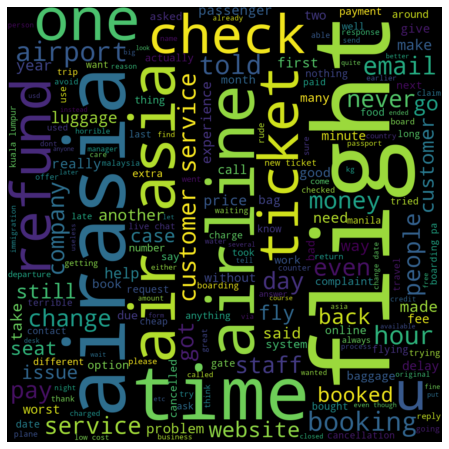

In [117]:
test =  dataset['Comment']
s = ' '
text = s.join(test)

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='black', 
                min_font_size = 11).generate(text)
# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

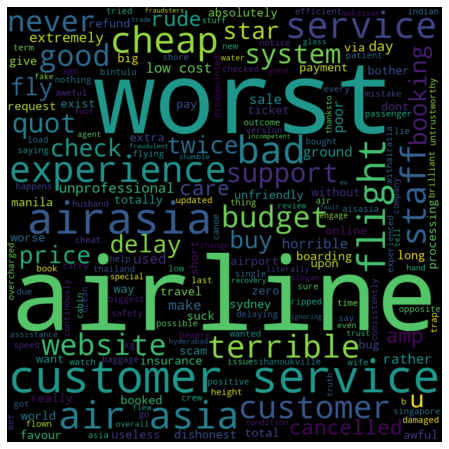

In [118]:
test_1 =  dataset['Title']
s = ' '
text_1 = s.join(test_1)

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='black', 
                min_font_size = 11).generate(text_1)
# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Frequency of Top20

In [119]:
# Most frequent words in short description (Comment)
comment_most_freq_words = pd.Series(" ".join(dataset['Comment']).split()).value_counts()
comment_most_freq_words.head(20)

flight      308
airasia     163
time        136
airline     119
service     107
customer    106
asia        101
air          96
get          91
ticket       90
one          78
refund       75
airport      67
u            63
check        62
even         62
booking      62
change       61
hour         60
staff        58
dtype: int64

In [120]:
# Most frequent words in short description (Title)
title_most_freq_words = pd.Series(" ".join(dataset['Title']).split()).value_counts()
title_most_freq_words.head(20)

airline       28
worst         27
service       24
customer      22
ever          18
airasia       14
asia          11
air           11
bad           10
flight        10
experience     9
cheap          9
staff          8
would          8
terrible       7
budget         6
never          6
good           6
website        6
support        5
dtype: int64

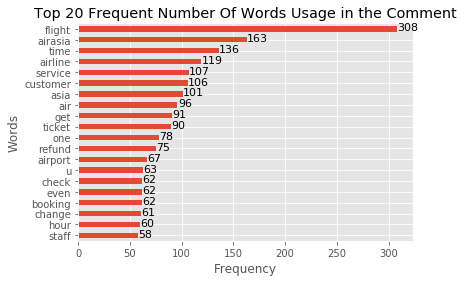

In [121]:
# comment plot
comment_freq_plot = comment_most_freq_words.head(20).sort_values(ascending = True).plot(kind="barh",
                                                                                        title = "Top 20 Frequent Number Of Words Usage in the Comment")

plt.style.use("ggplot")
comment_freq_plot.set_xlabel("Frequency")
comment_freq_plot.set_ylabel("Words")

totals = []
for i in comment_freq_plot.patches:
    totals.append(i.get_width())

for i in comment_freq_plot.patches:
    comment_freq_plot.text(i.get_width()+.3,i.get_y()+0.1,str(i.get_width()),
                           fontsize = 11,color= 'black')

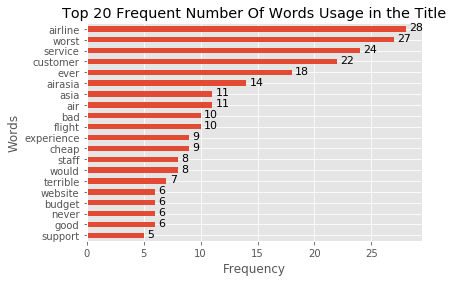

In [122]:
# title plot
title_freq_plot = title_most_freq_words.head(20).sort_values(ascending = True).plot(kind="barh",
                                                                                        title = "Top 20 Frequent Number Of Words Usage in the Title")

plt.style.use("ggplot")
title_freq_plot.set_xlabel("Frequency")
title_freq_plot.set_ylabel("Words")

totals = []
for i in title_freq_plot.patches:
    totals.append(i.get_width())

for i in title_freq_plot.patches:
    title_freq_plot.text(i.get_width()+.3,i.get_y()+0.1,str(i.get_width()),
                           fontsize = 11,color= 'black')

# Ratings

In [123]:
dataset['Length'] = dataset["Comment"].apply(lambda x: len(x) - x.count(" "))
dataset.head()

,Rating,Title,Comment,Length
0,1,cheap efficient safety issue,air asia cheap efficient limited leg room tall...,875
1,1,beware mistake scam,refused boarding due air asia ticketing error ...,697
2,1,aweful totally disappointed,aweful totally disappointed worse nothing wast...,93
3,5,would book,happy service airasia charles robert c bulilan...,92
4,1,help booking cancelled without refund,help booking cancelled without refund terrible...,549


## Using Bi-Grams

In [124]:
#comment
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(dataset['Comment'])
frequencies = sum(sparse_matrix).toarray()[0]
bi_grams_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [125]:
#title
word_vectorizer1 = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer1.fit_transform(dataset['Title'])
frequencies1 = sum(sparse_matrix).toarray()[0]
bi_grams_df1 = pd.DataFrame(frequencies1, index=word_vectorizer1.get_feature_names(), columns=['frequency'])

In [126]:
bi_grams_df.sort_values(by = "frequency",ascending=False).head(20)


,frequency
air asia,88
customer service,50
kuala lumpur,17
boarding pa,17
new ticket,17
live chat,17
low cost,14
change date,13
even though,12
worst airline,10


In [127]:
bi_grams_df1.sort_values(by = "frequency",ascending=False).head(20)

,frequency
customer service,15
air asia,10
worst airline,9
airline ever,5
budget airline,4
low cost,3
service ever,3
customer support,3
would rather,3
terrible customer,2


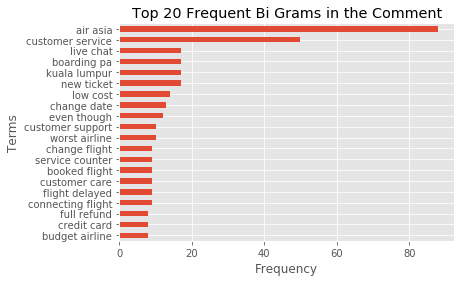

In [128]:
plt.style.use("ggplot")
plt.xlabel("Frequency",)
plt.ylabel("Terms")
top20_bigrams = bi_grams_df["frequency"].sort_values(ascending = False).head(20)

top20_bigrams.head(20).sort_values(ascending = True).plot(kind="barh",
                                                          title = "Top 20 Frequent Bi Grams in the Comment")

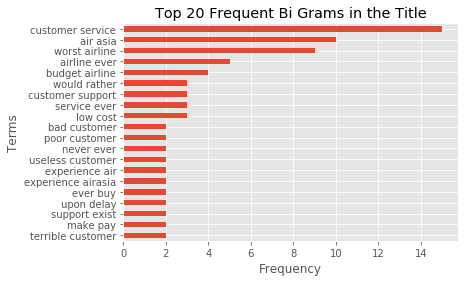

In [129]:
plt.style.use("ggplot")
plt.xlabel("Frequency",)
plt.ylabel("Terms")
top20_title_bigrams = bi_grams_df1["frequency"].sort_values(ascending = False).head(20)

top20_title_bigrams.head(20).sort_values(ascending = True).plot(kind="barh",
                                                          title = "Top 20 Frequent Bi Grams in the Title")

# Sentiment Analysis

In [132]:
sia = SentimentIntensityAnalyzer()
dataset['Scores'] = dataset['Comment'].apply(lambda Comment: sia.polarity_scores(Comment)) 
dataset.head()

,Rating,Title,Comment,Length,Scores
0,1,cheap efficient safety issue,air asia cheap efficient limited leg room tall...,875,"{'neg': 0.229, 'neu': 0.654, 'pos': 0.117, 'co..."
1,1,beware mistake scam,refused boarding due air asia ticketing error ...,697,"{'neg': 0.191, 'neu': 0.652, 'pos': 0.157, 'co..."
2,1,aweful totally disappointed,aweful totally disappointed worse nothing wast...,93,"{'neg': 0.481, 'neu': 0.328, 'pos': 0.191, 'co..."
3,5,would book,happy service airasia charles robert c bulilan...,92,"{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'comp..."
4,1,help booking cancelled without refund,help booking cancelled without refund terrible...,549,"{'neg': 0.104, 'neu': 0.725, 'pos': 0.171, 'co..."


In [133]:
dataset['Compound'] = dataset['Scores'].apply(lambda d:d['compound'])
dataset.head()

,Rating,Title,Comment,Length,Scores,Compound
0,1,cheap efficient safety issue,air asia cheap efficient limited leg room tall...,875,"{'neg': 0.229, 'neu': 0.654, 'pos': 0.117, 'co...",-0.9501
1,1,beware mistake scam,refused boarding due air asia ticketing error ...,697,"{'neg': 0.191, 'neu': 0.652, 'pos': 0.157, 'co...",-0.2328
2,1,aweful totally disappointed,aweful totally disappointed worse nothing wast...,93,"{'neg': 0.481, 'neu': 0.328, 'pos': 0.191, 'co...",-0.7944
3,5,would book,happy service airasia charles robert c bulilan...,92,"{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'comp...",0.8107
4,1,help booking cancelled without refund,help booking cancelled without refund terrible...,549,"{'neg': 0.104, 'neu': 0.725, 'pos': 0.171, 'co...",0.7054


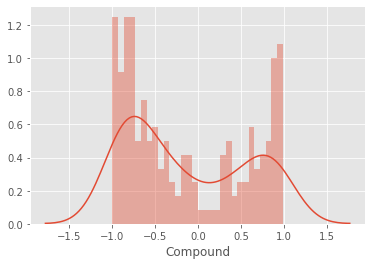

In [134]:
#Sentiment Polarity Distribution

import seaborn as sns
sns.distplot(dataset['Compound'],bins=30);

In [135]:
dataset['Sentiment_Score'] = dataset['Compound'].apply(lambda score:"positive" if score >= 0.2 
                                                       else ("negative" if score <= -0.2 else "neutral"))
dataset.head()

,Rating,Title,Comment,Length,Scores,Compound,Sentiment_Score
0,1,cheap efficient safety issue,air asia cheap efficient limited leg room tall...,875,"{'neg': 0.229, 'neu': 0.654, 'pos': 0.117, 'co...",-0.9501,negative
1,1,beware mistake scam,refused boarding due air asia ticketing error ...,697,"{'neg': 0.191, 'neu': 0.652, 'pos': 0.157, 'co...",-0.2328,negative
2,1,aweful totally disappointed,aweful totally disappointed worse nothing wast...,93,"{'neg': 0.481, 'neu': 0.328, 'pos': 0.191, 'co...",-0.7944,negative
3,5,would book,happy service airasia charles robert c bulilan...,92,"{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'comp...",0.8107,positive
4,1,help booking cancelled without refund,help booking cancelled without refund terrible...,549,"{'neg': 0.104, 'neu': 0.725, 'pos': 0.171, 'co...",0.7054,positive


In [136]:
dataset['Rating'] = dataset['Rating'].astype(int)
dataset ['Rating_to_Sentiment'] = dataset['Rating'].apply(lambda rate:"positive" if rate >= 4 
                                                          else ("negative" if rate <= 2 else "neutral"))
dataset.head()

,Rating,Title,Comment,Length,Scores,Compound,Sentiment_Score,Rating_to_Sentiment
0,1,cheap efficient safety issue,air asia cheap efficient limited leg room tall...,875,"{'neg': 0.229, 'neu': 0.654, 'pos': 0.117, 'co...",-0.9501,negative,negative
1,1,beware mistake scam,refused boarding due air asia ticketing error ...,697,"{'neg': 0.191, 'neu': 0.652, 'pos': 0.157, 'co...",-0.2328,negative,negative
2,1,aweful totally disappointed,aweful totally disappointed worse nothing wast...,93,"{'neg': 0.481, 'neu': 0.328, 'pos': 0.191, 'co...",-0.7944,negative,negative
3,5,would book,happy service airasia charles robert c bulilan...,92,"{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'comp...",0.8107,positive,positive
4,1,help booking cancelled without refund,help booking cancelled without refund terrible...,549,"{'neg': 0.104, 'neu': 0.725, 'pos': 0.171, 'co...",0.7054,positive,negative


In [137]:
dataset['Rating_to_Sentiment'].value_counts()

negative    148
positive     23
neutral      11
Name: Rating_to_Sentiment, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

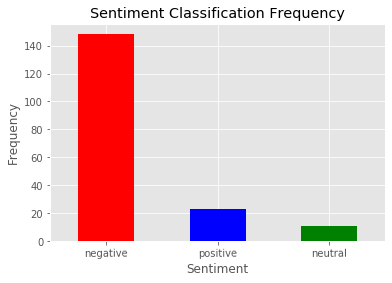

In [138]:
dataset['Rating_to_Sentiment'].value_counts().plot(kind = "bar",color = ["red","blue","green"])
plt.title("Sentiment Classification Frequency")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.xticks(rotation = "0.5")

In [139]:
print(accuracy_score(dataset['Sentiment_Score'],dataset['Rating_to_Sentiment']))
print(confusion_matrix(dataset['Sentiment_Score'],dataset['Rating_to_Sentiment']))

0.6208791208791209
[[94  1  5]
 [14  1  0]
 [40  9 18]]


In [140]:
print(classification_report(dataset['Sentiment_Score'],dataset['Rating_to_Sentiment']))

              precision    recall  f1-score   support

    negative       0.64      0.94      0.76       100
     neutral       0.09      0.07      0.08        15
    positive       0.78      0.27      0.40        67

    accuracy                           0.62       182
   macro avg       0.50      0.43      0.41       182
weighted avg       0.64      0.62      0.57       182



In [141]:
dataset.to_csv(r'data.csv', index = None, header=True)

## Latent Dirichlet Allocation (LDA) - Topic bag of words
### Preparation data for Extracting the Topics

In [142]:
# Discard the words that showed up  in 90% of comments
# at least show in 2 comments and remove stop words
cv = CountVectorizer(max_df=0.9, min_df=2,stop_words='english')

dtm = cv.fit_transform(dataset['Comment'])
dtm

<182x1099 sparse matrix of type '<class 'numpy.int64'>'
	with 6548 stored elements in Compressed Sparse Row format>

In [143]:
LDA = LatentDirichletAllocation(n_components=10) 
LDA.fit(dtm)

LatentDirichletAllocation()

In [144]:
print(len(cv.get_feature_names()))
print(type(cv.get_feature_names()))

1099
<class 'list'>


In [145]:
#grab a vocabulary of words
cv.get_feature_names()[500]

'june'

In [146]:
#grab the topic
print(LDA.components_)

[[1.09999592 0.1        1.09999587 ... 0.1        0.1        0.1       ]
 [0.1        0.1        0.1        ... 0.1        0.1        0.1       ]
 [0.58061487 0.1        1.47763346 ... 1.09997695 1.09996341 1.09997637]
 ...
 [6.10000394 0.1        0.10000045 ... 0.1        1.10000002 1.09999935]
 [5.98915716 1.1000004  3.72236347 ... 2.0999995  0.1        0.1       ]
 [0.10000245 1.09999959 0.1        ... 1.09999926 0.1        0.1       ]]


In [147]:
single_topic = LDA.components_[0]
single_topic.argsort()

array([ 290,  851,   28, ...,  118, 1063,   34], dtype=int64)

In [148]:
#Argsort index positions sorted
# top 10
single_topic.argsort()[-10:]

array([  31,  975,  972,  872,  159,  370,  242,  118, 1063,   34],
      dtype=int64)

In [149]:
top_ten =  single_topic.argsort()[-10:]
j = 1
for index in top_ten:
    print(j,"- ",cv.get_feature_names()[index])
    j+=1

1 -  airasia
2 -  time
3 -  ticket
4 -  service
5 -  change
6 -  flight
7 -  customer
8 -  booking
9 -  website
10 -  airline


### Extract the Top 20 Positive Topics

In [150]:
# store the data with positive and negative feeling inside the positive and negative variable
positive = dataset[dataset['Sentiment_Score']=='positive']
negative = dataset[dataset['Sentiment_Score']=='negative']
positive.head()

,Rating,Title,Comment,Length,Scores,Compound,Sentiment_Score,Rating_to_Sentiment
3,5,would book,happy service airasia charles robert c bulilan...,92,"{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'comp...",0.8107,positive,positive
4,1,help booking cancelled without refund,help booking cancelled without refund terrible...,549,"{'neg': 0.104, 'neu': 0.725, 'pos': 0.171, 'co...",0.7054,positive,negative
5,1,really care customer,really care customer listen concern solve real...,641,"{'neg': 0.159, 'neu': 0.69, 'pos': 0.151, 'com...",0.2365,positive,negative
10,5,bought ticket thailand day ago,bought ticket thailand day ago service great m...,177,"{'neg': 0.0, 'neu': 0.668, 'pos': 0.332, 'comp...",0.9371,positive,positive
13,1,go sihanoukville singapore,biggest complaint company lack integrity tried...,790,"{'neg': 0.072, 'neu': 0.819, 'pos': 0.109, 'co...",0.7783,positive,negative


In [151]:
cv = CountVectorizer(max_df=0.9, min_df=2,stop_words='english')
dtmPos = cv.fit_transform(positive['Comment'])
LDA = LatentDirichletAllocation(n_components=10) 
LDA.fit(dtmPos)

LatentDirichletAllocation()

In [152]:
single_topic = LDA.components_[0]
single_topic.argsort()
single_topic.argsort()[-20:]

array([191, 225, 528,  65, 513, 346, 371, 486, 105, 127,  62,  18, 496,
        90, 182, 214, 488, 133,  20,  84], dtype=int64)

In [153]:
#show the highest probility word per topic
top_ten =  single_topic.argsort()[-20:]
j = 1
for index in top_ten:
    print(j,"- ",cv.get_feature_names()[index])
    j+=1

1 -  free
2 -  hour
3 -  website
4 -  budget
5 -  use
6 -  pay
7 -  price
8 -  time
9 -  com
10 -  course
11 -  booking
12 -  airasia
13 -  travel
14 -  cheap
15 -  flight
16 -  help
17 -  told
18 -  date
19 -  airline
20 -  change


In [154]:
for index, topic in enumerate (LDA.components_):
    print(f"The top positve 10 words for topic #{i}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-10:]])
    print('\n')
    print('\n')

The top positve 10 words for topic #Rectangle(xy=(0, 18.75), width=28, height=0.5, angle=0)
['booking', 'airasia', 'travel', 'cheap', 'flight', 'help', 'told', 'date', 'airline', 'change']




The top positve 10 words for topic #Rectangle(xy=(0, 18.75), width=28, height=0.5, angle=0)
['passenger', 'work', 'lie', 'way', 'good', 'food', 'service', 'flight', 'airasia', 'check']




The top positve 10 words for topic #Rectangle(xy=(0, 18.75), width=28, height=0.5, angle=0)
['care', 'website', 'case', 'flight', 'good', 'customer', 'airasia', 'reply', 'day', 'email']




The top positve 10 words for topic #Rectangle(xy=(0, 18.75), width=28, height=0.5, angle=0)
['boarding', 'cost', 'hour', 'singapore', 'gate', 'airline', 'case', 'time', 'flight', 'airasia']




The top positve 10 words for topic #Rectangle(xy=(0, 18.75), width=28, height=0.5, angle=0)
['day', 'luggage', 'seat', 'air', 'service', 'airline', 'time', 'asia', 'company', 'flight']




The top positve 10 words for topic #Rectangle

### Extract the Top 20 Negative Topics

In [155]:
cv = CountVectorizer(max_df=0.9, min_df=2,stop_words='english')
dtmNeg = cv.fit_transform(negative['Comment'])
LDA = LatentDirichletAllocation(n_components=10) 
LDA.fit(dtmNeg)
single_topic = LDA.components_[0]
#return the index position that is sorted from least to greatest (sort from lowest to highest value)
single_topic.argsort()
# the highest ones are the at the end of array (Top 20 Value)
single_topic.argsort()[-20:]
top_ten =  single_topic.argsort()[-20:]
j = 1
for index in top_ten:
    print(j,"- ",cv.get_feature_names()[index])
    j+=1

1 -  airport
2 -  boarding
3 -  really
4 -  online
5 -  process
6 -  using
7 -  airasia
8 -  make
9 -  day
10 -  charge
11 -  different
12 -  number
13 -  website
14 -  suck
15 -  choice
16 -  self
17 -  son
18 -  booking
19 -  check
20 -  seat


In [156]:
for index, topic in enumerate (LDA.components_):
    print(f"The top 10 Negative words for topic #{i}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-10:]])
    print('\n')
    print('\n')

The top 10 Negative words for topic #Rectangle(xy=(0, 18.75), width=28, height=0.5, angle=0)
['different', 'number', 'website', 'suck', 'choice', 'self', 'son', 'booking', 'check', 'seat']




The top 10 Negative words for topic #Rectangle(xy=(0, 18.75), width=28, height=0.5, angle=0)
['said', 'new', 'airasia', 'ticket', 'help', 'people', 'boarding', 'check', 'time', 'flight']




The top 10 Negative words for topic #Rectangle(xy=(0, 18.75), width=28, height=0.5, angle=0)
['flight', 'worst', 'kid', 'bag', 'service', 'rude', 'airport', 'airline', 'experience', 'staff']




The top 10 Negative words for topic #Rectangle(xy=(0, 18.75), width=28, height=0.5, angle=0)
['booking', 'date', 'hour', 'agent', 'refund', 'email', 'time', 'change', 'airasia', 'flight']




The top 10 Negative words for topic #Rectangle(xy=(0, 18.75), width=28, height=0.5, angle=0)
['time', 'service', 'form', 'pay', 'credit', 'check', 'counter', 'airline', 'flight', 'ticket']




The top 10 Negative words for topic 

# ML Algorithms

In [157]:
dataset.head()

,Rating,Title,Comment,Length,Scores,Compound,Sentiment_Score,Rating_to_Sentiment
0,1,cheap efficient safety issue,air asia cheap efficient limited leg room tall...,875,"{'neg': 0.229, 'neu': 0.654, 'pos': 0.117, 'co...",-0.9501,negative,negative
1,1,beware mistake scam,refused boarding due air asia ticketing error ...,697,"{'neg': 0.191, 'neu': 0.652, 'pos': 0.157, 'co...",-0.2328,negative,negative
2,1,aweful totally disappointed,aweful totally disappointed worse nothing wast...,93,"{'neg': 0.481, 'neu': 0.328, 'pos': 0.191, 'co...",-0.7944,negative,negative
3,5,would book,happy service airasia charles robert c bulilan...,92,"{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'comp...",0.8107,positive,positive
4,1,help booking cancelled without refund,help booking cancelled without refund terrible...,549,"{'neg': 0.104, 'neu': 0.725, 'pos': 0.171, 'co...",0.7054,positive,negative


In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:182,2], dataset.iloc[:182, 0], test_size=0.25, random_state=0)

In [159]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)


123    booked air asia flight mumbai syd book additio...
111    airasia bad airline book jkt narita ticket iss...
19     hello travel week job many flight year time to...
139    travel air asia regularly especially kuala lum...
135    flight booked airasia found afterwards suppose...
160    traveled quite lot air asia time though ordere...
16     husband got boarding pas pen flight kul per fl...
51     worst booked flight thru app didnt accepted ca...
162    horrible experience travelling manila puerto p...
125    used good plenty destination good deal lately ...
40     flight airline fine baggage drop check nightma...
108    awful unresponsive support point promised noth...
22     like flying price great website mobile app tot...
165    website mess work add ons ask remove gave usel...
86     customer service non existent value money smok...
131    july reserved paid window seat flight cebu cit...
146    dear please beware big loyalty program marketi...
92     booked flight online air

In [160]:
X_train.shape

(136,)

In [161]:
y_train.shape


(136,)

In [162]:
X_test.shape

(46,)

In [163]:
y_test.shape

(46,)

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=6000) # Limiting features because of computation limitations (using CPU)

X_train_idf = tf_idf.fit_transform(X_train).toarray()
X_test_idf = tf_idf.transform(X_test).toarray()

In [165]:
# Shape of X_train
X_test_idf.shape

(46, 2318)

In [166]:
# Lets do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_idf = sc.fit_transform(X_train_idf)
X_test_idf = sc.transform(X_test_idf)

## Random Forest 

In [167]:
# Create an Random Forest Tree Classifier 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0, max_depth=100)
rfc.fit(X_train_idf, y_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [168]:
# Predicting the Test set results
y_pred = rfc.predict(X_test_idf)

In [169]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[35,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0]], dtype=int64)

In [170]:
# Print Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test , y_pred)
print("Accuracy of Random Forest Tree is: {:.2f}%".format(accuracy*100))

Accuracy of Random Forest Tree is: 76.09%


## Guassian NB

In [171]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train_idf, y_train)

GaussianNB()

In [172]:
# Predicting the Test Set Results
y_pred_naive = naive.predict(X_test_idf)

In [173]:
# Confusion matrix
cm_naive = confusion_matrix(y_test, y_pred_naive)
print(cm)

[[35  0  0  0  0]
 [ 2  0  0  0  0]
 [ 3  0  0  0  0]
 [ 1  0  0  0  0]
 [ 5  0  0  0  0]]


In [174]:
accuracy_naive = accuracy_score(y_test , y_pred_naive)
print("Accuracy of Naive Bayes is: {:.2f}%".format(accuracy_naive*100))

Accuracy of Naive Bayes is: 78.26%


In [175]:
## For ML, Random forest and naive bayes, we took comment and rating as x and y. and observed the performance...
## The RF score 76.09% and NB Scores 78.26%
## Thank you..